In [63]:
import lightkurve as lk

In [251]:
targname = 'COROT-4'
mag = '13.67'
search_result = lk.search_targetpixelfile(targname, mission='TESS')

# magnitudes of different stars
# WASP 15 = 11.3
# WASP 8 = 9.9
# WASP 18 = 9.2
# WASP 12 = 11.6
# WASP 3 = 10.63
# WASP 6 = 11.9
# WASP 95 = 10.09
# WASP 56 = 11.48
# TRES 3 = 12.4
# TRES 8 = 8.2
# WASP 150 = 12.0
# WASP 127 = 10.2
# WASP 128 = 12.5


In [252]:
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 6,36440357,tess2018349182459-s0006-0000000036440357-0126-s_tp.fits,0.0


In [253]:
tpf = search_result.download(quality_bitmask='default')

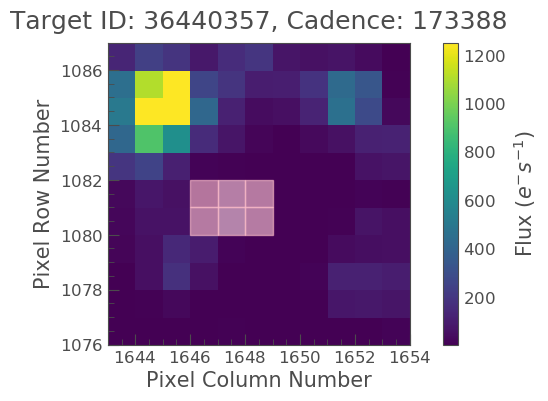

In [254]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask);

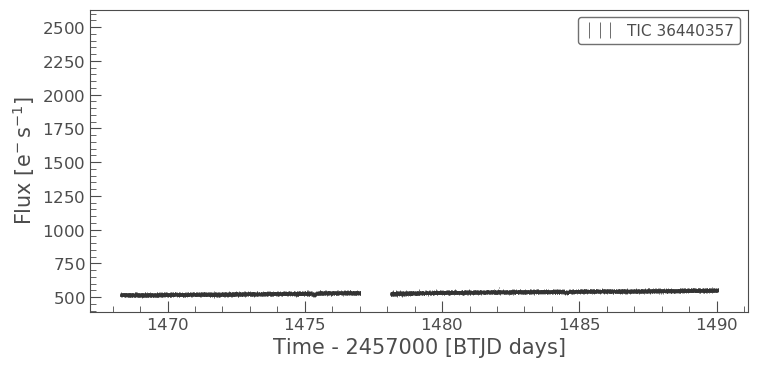

In [255]:
lc = tpf.to_lightcurve()
lc.errorbar();

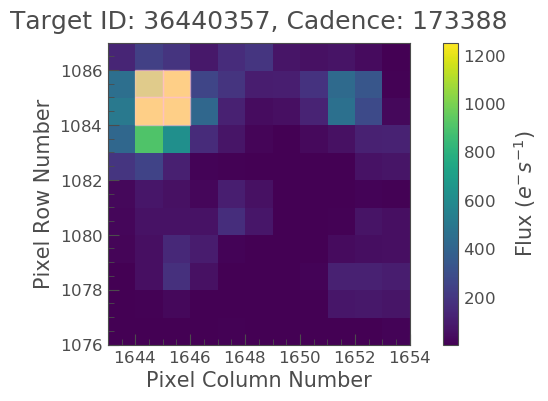

In [256]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

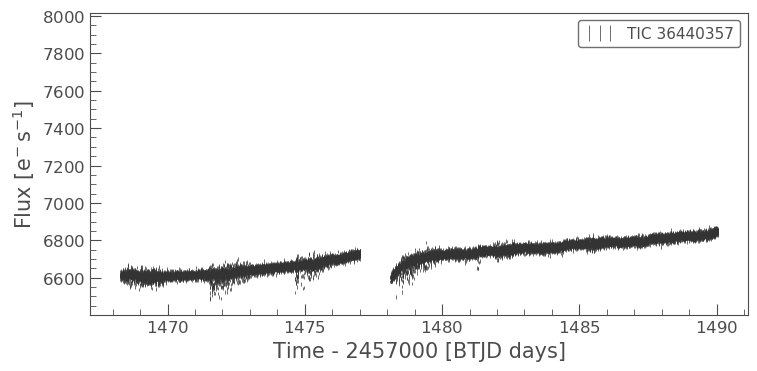

In [257]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar();

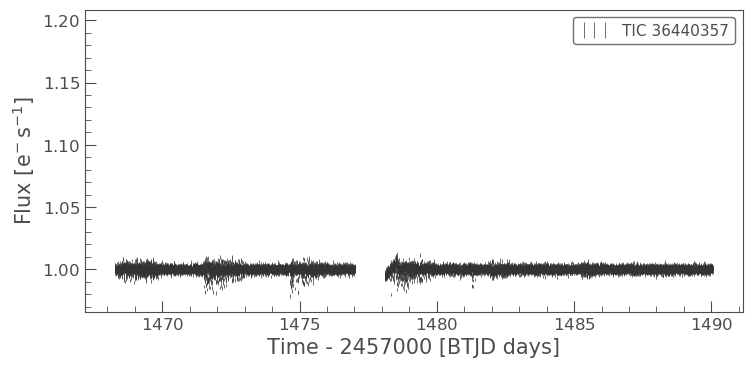

In [258]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

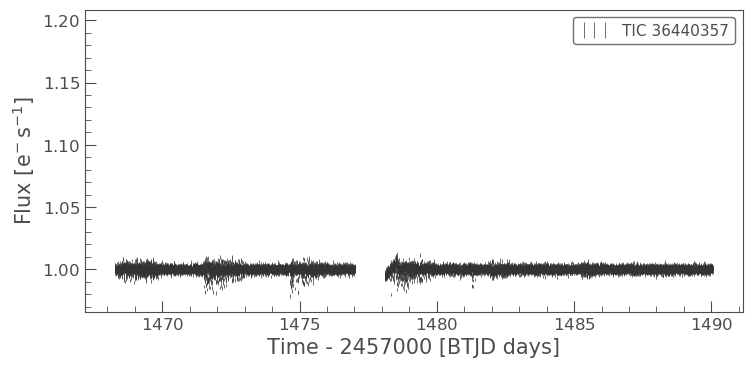

In [259]:
# Flag the times that are good quality
mask = (flat_lc.time > 0)
masked_lc = flat_lc[mask]
masked_lc.errorbar();

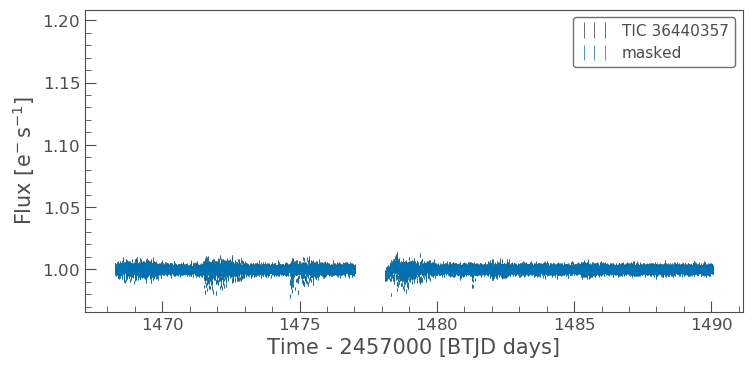

In [260]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax, label='masked');

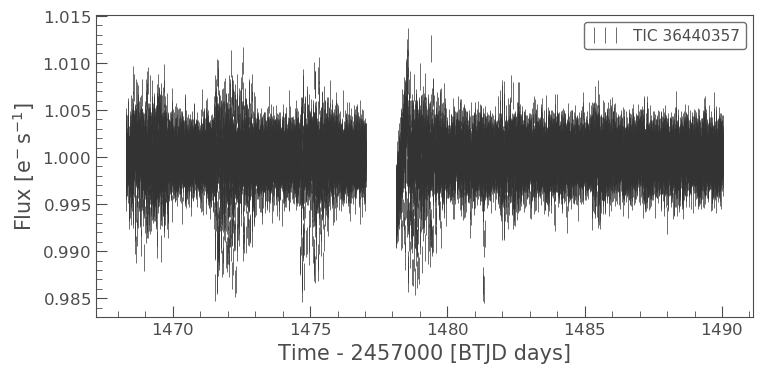

In [261]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

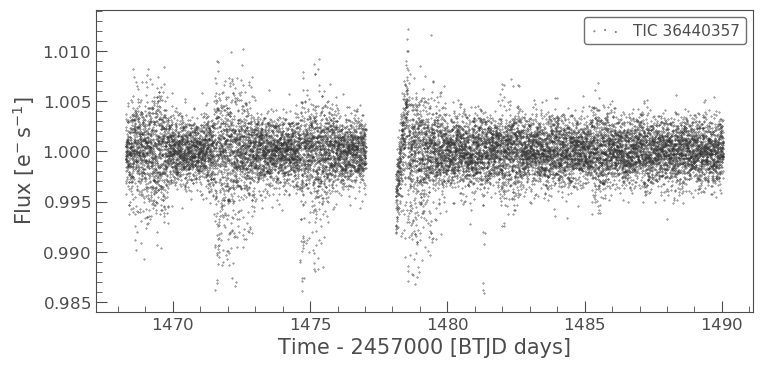

In [262]:
clipped_lc.scatter(s=0.1);

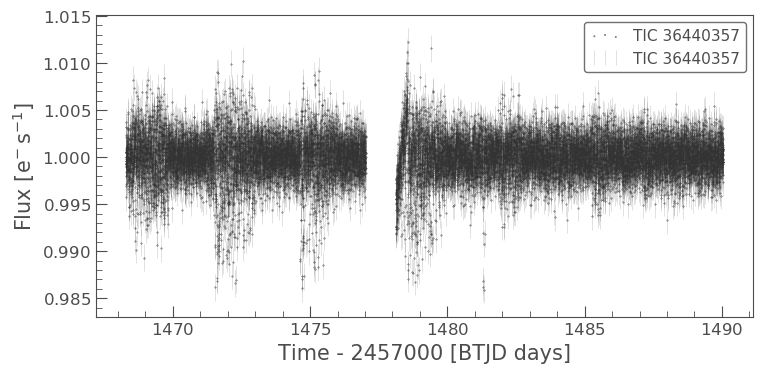

In [263]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

In [236]:
## ABOUT TO SAVE! HEADS UP

In [264]:
clipped_lc.to_fits(path = "/Users/piperfrances/BSRC/code/reference_planet_"+targname+"_"+mag+".fits")

In [57]:
# Stop here unless you want to fold the light curve!

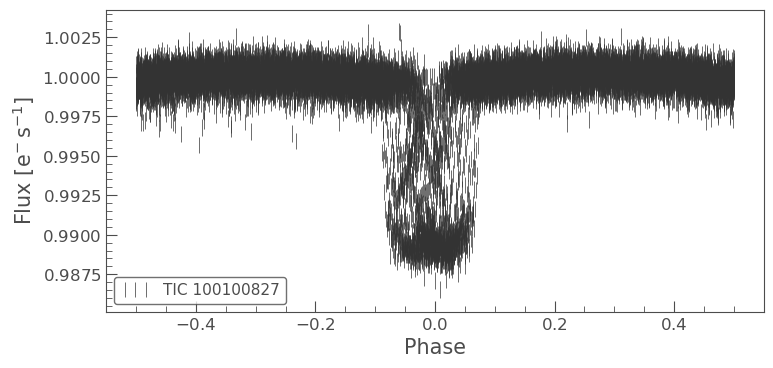

In [179]:
p = 0.939 #period of the planet's orbit
t0 = 1354.5 #start time of the transit (t zero)
folded_lc = clipped_lc.fold(p, t0)
folded_lc.errorbar();

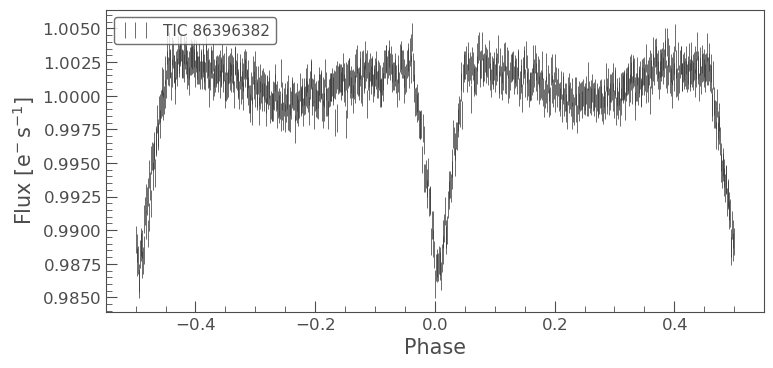

In [112]:
binned_lc = folded_lc.bin(binsize=10)  # Average 10 points per bin
binned_lc.errorbar();

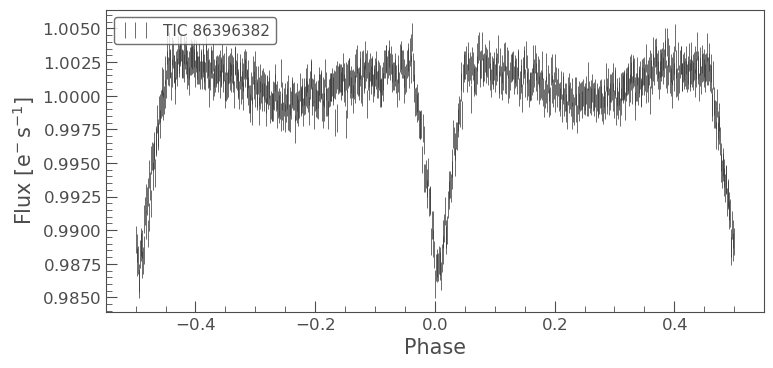

In [113]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[mask]
lc.remove_outliers(sigma=6).fold(p, t0).bin(binsize=10).errorbar();

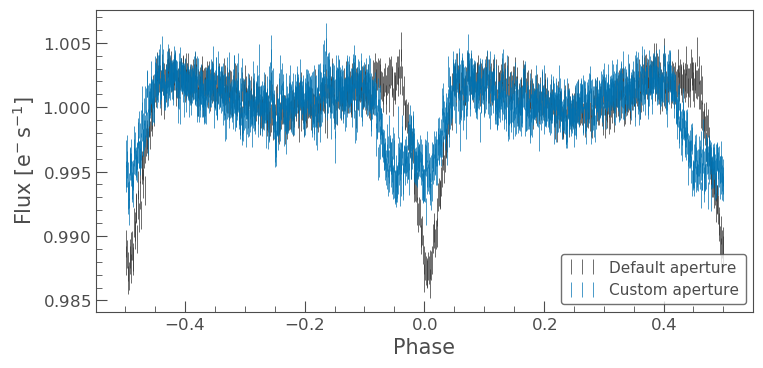

In [114]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[mask].remove_outliers(6).fold(p, t0).bin(10)

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)

custom_mask = (custom_lc.time < 1347.5) | (custom_lc.time > 1350)
custom_lc = custom_lc[(custom_mask)].remove_outliers(6).fold(p, t0).bin(10)

ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');

In [58]:
custom_lc.to_fits(path = "/Users/piperfrances/BSRC/code/reference_planet_"+targname+"_"+mag+".fits")

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1a2347b2d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a23230cd0>]

In [197]:
mag = 15.52

In [200]:
mag = "15.52"